# A simple analysis of the ANTARES neutrino data

This example directly uses pyvo. For the full KM3NeT course see
https://edu.km3net.de/lesson/a-simple-analysis-in-python/

In [6]:
import pyvo as vo
import matplotlib.pyplot as plt

The data is directly available from the KM3NeT VO server, which is searchable with ADQL (SQL-like query language)

In [7]:
service = vo.dal.TAPService("http://vo.km3net.de/__system__/tap/run/tap")
resultset = service.search("SELECT * FROM ant20_01.main")

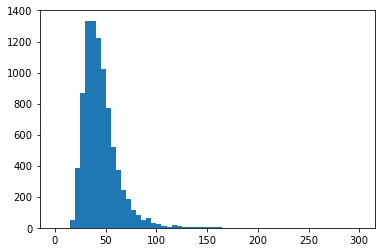

In [8]:
# distribution of number of hits
nhits_array = []
i=0
while i < len(resultset): 
    for row in resultset:
        nhits = resultset['nhit', i ]
        i=i+1
        nhits_array.append(nhits)

plt.hist(nhits_array, bins=60 , range=[0,300] , label = "all_events")
plt.show()

In [9]:
# choose the best reconstructed events (angular_error<=0.2)
nhits_array_gr = []
i=0
while i < len(resultset): 
    for row in resultset:
        beta = resultset['beta', i ]
        nhits = resultset['nhit', i ]
        i=i+1
        if beta<=0.2 :
            nhits_array_gr.append(nhits)

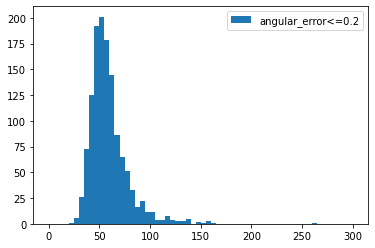

In [10]:
#plt.hist(nhits_array, bins=60 , range=[0,300] , label = "all_events")
plt.hist(nhits_array_gr, bins=60 , range=[0,300]  , label = "angular_error<=0.2")
plt.legend()
plt.show()

Create a RA vs declination scatter plot

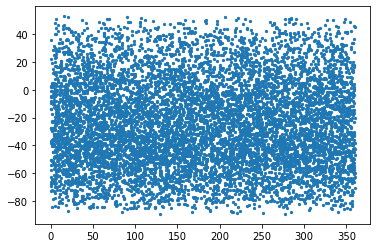

In [11]:

ra_array = []
decl_array = []
i=0
while i < len(resultset): 
    for row in resultset:
        ra = resultset['ra', i ]
        decl = resultset['decl', i ]
        i=i+1
        ra_array.append(ra)
        decl_array.append(decl)

plt.scatter( ra_array , decl_array , s=5 )
plt.show()